# 3-3 New Problem 
> Tensorflow hub

In [1]:
!python3 -m pip install tensorflow-hub

In [27]:
import tf_keras as keras
from tf_keras import layers
import tensorflow_hub as hub

/Users/jameshoyu/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
/Users/jameshoyu/.pyenv/versions/3.11.9/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [30]:
hub_efficientb0 = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Rescaling(1.0 / 255.0),
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-classification/versions/1")
])

In [31]:
import numpy as np
from PIL import Image

dog_png = np.array(Image.open('images/dog.png'))

In [32]:
from keras.applications import efficientnet

predictions = hub_efficientb0.predict(dog_png[np.newaxis,:])
efficientnet.decode_predictions(predictions)

1/1 [==============================] - 0s 349ms/step


[[('n02099712', 'Labrador_retriever', np.float32(0.36829394)),
  ('n02104029', 'kuvasz', np.float32(0.19339918)),
  ('n02099601', 'golden_retriever', np.float32(0.061458148)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.057797033)),
  ('n02095889', 'Sealyham_terrier', np.float32(0.017902756))]]

## Huggingface

In [10]:

# !python3 -m pip uninstall -y transformers torch
!python3 -m pip install torch torchvision torchaudio
!python3 -m pip install transformers
# !python3 -m pip install --upgrade pip

In [14]:
!python3 -m pip uninstall -y transformers tokenizers safetensors huggingface-hub accelerate
!python3 -m pip install -U pip setuptools wheel
!python3 -m pip install "transformers[torch]" accelerate

Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: tokenizers 0.22.1
Uninstalling tokenizers-0.22.1:
  Successfully uninstalled tokenizers-0.22.1
Found existing installation: safetensors 0.7.0
Uninstalling safetensors-0.7.0:
  Successfully uninstalled safetensors-0.7.0
Found existing installation: huggingface-hub 0.36.0
Uninstalling huggingface-hub-0.36.0:
  Successfully uninstalled huggingface-hub-0.36.0
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-mac

In [18]:
!python3 -m pip install transformers

In [25]:
import torch
from transformers import pipeline

pipe = pipeline(task='image-classification', device=0,
                model='google/efficientnet-b0')
pipe('images/dog.png')

ModuleNotFoundError: Could not import module 'pipeline'. Are this object's requirements defined correctly?

In [10]:
!python3 -m pip uninstall -y transformers tokenizers safetensors
!python3 -m pip install -U pip setuptools wheel
!python3 -m pip install -U transformers


Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: tokenizers 0.22.1
Uninstalling tokenizers-0.22.1:
  Successfully uninstalled tokenizers-0.22.1
Found existing installation: safetensors 0.7.0
Uninstalling safetensors-0.7.0:
  Successfully uninstalled safetensors-0.7.0
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.7.0-cp38-abi3-macosx_11_0_arm64.whl.metadata (4.1 kB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)
Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl (2.9 MB)
Using cached safetensors-0.7.0-cp38-abi3-macosx_11_0_arm64.whl (447 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [transformers] [transformers]


## Transfer Learning

In [20]:
!gdown 10bnEC6-ZfXZFZ2mb3zoWd38TjYufanWo
!unzip -q Pistachio_Image_Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=10bnEC6-ZfXZFZ2mb3zoWd38TjYufanWo
To: /Users/jameshoyu/Documents/003_Git/HonGong_Deep_Learning/Pistachio_Image_Dataset.zip
100%|██████████████████████████████████████| 25.9M/25.9M [00:00<00:00, 28.1MB/s]


In [24]:

pistachio_sample = np.array(Image.open('Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (1).jpg'))
pistachio_sample.shape

(600, 600, 3)

In [33]:
efficientb7 = keras.applications.EfficientNetB7()
predictions = efficientb7.predict(pistachio_sample[np.newaxis,:])
efficientnet.decode_predictions(predictions)

1/1 [==============================] - 2s 2s/step


[[('n01950731', 'sea_slug', np.float32(0.23482244)),
  ('n01924916', 'flatworm', np.float32(0.20674516)),
  ('n01943899', 'conch', np.float32(0.086224)),
  ('n01945685', 'slug', np.float32(0.08500541)),
  ('n01955084', 'chiton', np.float32(0.028243301))]]

In [34]:
keras_efficientb0_base = keras.applications.EfficientNetB0(include_top=False)
feature_map = keras_efficientb0_base(pistachio_sample[np.newaxis,:])
feature_map.shape

16705208/16705208 [==============================] - 1s 0us/step


TensorShape([1, 18, 18, 1280])

In [35]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    'Pistachio_Image_Dataset', image_size=(224, 224), batch_size=16, 
    validation_split=0.2, subset='both', seed=42
)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [36]:
keras_efficientb0_base.trainable=False

In [37]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras_efficientb0_base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [38]:
rmsprop = keras.optimizers.RMSprop(learning_rate=5e-5)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 [==============================] - 13s 101ms/step - loss: 0.5187 - accuracy: 0.7877 - val_loss: 0.3662 - val_accuracy: 0.9091
Epoch 2/20
108/108 [==============================] - 10s 97ms/step - loss: 0.3154 - accuracy: 0.9151 - val_loss: 0.2465 - val_accuracy: 0.9464
Epoch 3/20
108/108 [==============================] - 11s 98ms/step - loss: 0.2345 - accuracy: 0.9372 - val_loss: 0.1904 - val_accuracy: 0.9487
Epoch 4/20
108/108 [==============================] - 11s 99ms/step - loss: 0.1875 - accuracy: 0.9447 - val_loss: 0.1615 - val_accuracy: 0.9487
Epoch 5/20
108/108 [==============================] - 11s 99ms/step - loss: 0.1547 - accuracy: 0.9511 - val_loss: 0.1374 - val_accuracy: 0.9650
Epoch 6/20
108/108 [==============================] - 11s 100ms/step - loss: 0.1367 - accuracy: 0.9634 - val_loss: 0.1224 - val_accuracy: 0.9674
Epoch 7/20
108/108 [==============================] - 11s 101ms/step - loss: 0.1192 - accuracy: 0.9663 - val_loss: 0.1132 - val_accura

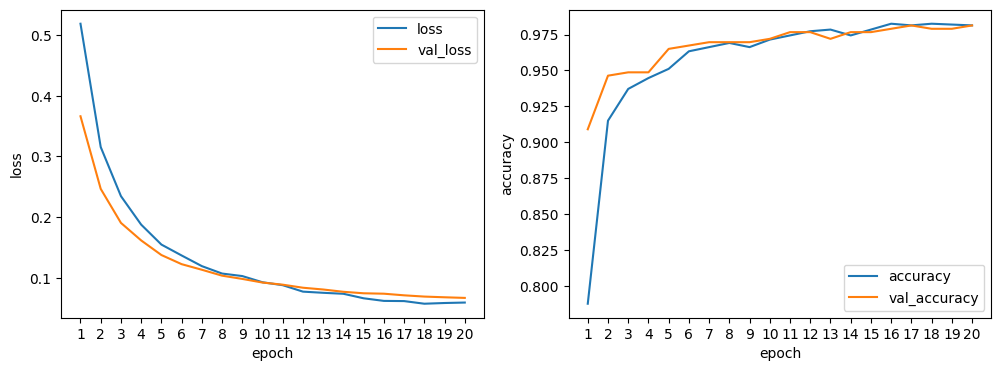

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(range(1, 21), hist.history['loss'], label='loss')
axs[0].plot(range(1, 21), hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(range(1, 21))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[1].plot(range(1, 21), hist.history['accuracy'], label='accuracy')
axs[1].plot(range(1, 21), hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xticks(range(1, 21))
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
plt.show()

## Mini project

In [41]:
kaggle_efficientb0_base = hub.KerasLayer('https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1')

inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1.0 / 255.0)(inputs)
x = kaggle_efficientb0_base(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [42]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 [==============================] - 14s 95ms/step - loss: 0.3783 - accuracy: 0.8668 - val_loss: 0.2299 - val_accuracy: 0.9277
Epoch 2/20
108/108 [==============================] - 10s 92ms/step - loss: 0.1868 - accuracy: 0.9482 - val_loss: 0.1503 - val_accuracy: 0.9557
Epoch 3/20
108/108 [==============================] - 10s 93ms/step - loss: 0.1316 - accuracy: 0.9639 - val_loss: 0.1219 - val_accuracy: 0.9627
Epoch 4/20
108/108 [==============================] - 10s 94ms/step - loss: 0.1041 - accuracy: 0.9727 - val_loss: 0.1208 - val_accuracy: 0.9604
Epoch 5/20
108/108 [==============================] - 10s 94ms/step - loss: 0.0872 - accuracy: 0.9727 - val_loss: 0.1021 - val_accuracy: 0.9674
Epoch 6/20
108/108 [==============================] - 10s 95ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0882 - val_accuracy: 0.9697
Epoch 7/20
108/108 [==============================] - 10s 94ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0788 - val_accuracy:

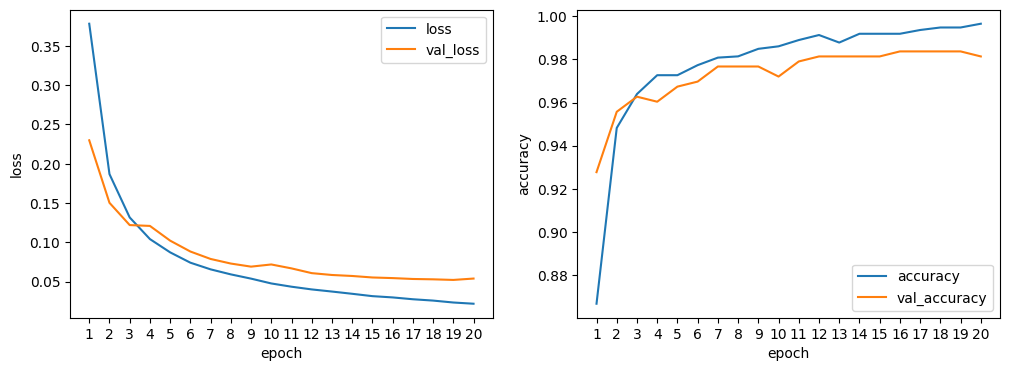

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(range(1, 21), hist.history['loss'], label='loss')
axs[0].plot(range(1, 21), hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(range(1, 21))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[1].plot(range(1, 21), hist.history['accuracy'], label='accuracy')
axs[1].plot(range(1, 21), hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xticks(range(1, 21))
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
plt.show()